Clase predicha para el ID 21: no
IDs (índices) de los 5 vecinos más cercanos: [17 11  9 19  8]


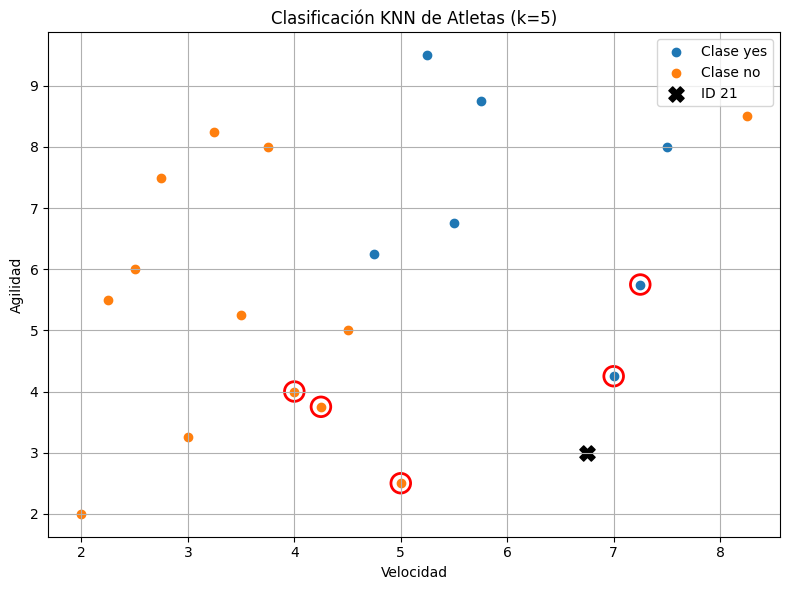

In [4]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------
# Datos de los atletas
# -------------------------
data = {
    "ID": list(range(1, 22)),
    "Velocidad": [2.50, 3.75, 2.25, 3.25, 2.75, 4.50, 3.50, 3.00, 4.00, 4.25,
                  2.00, 5.00, 8.25, 5.75, 4.75, 5.50, 5.25, 7.00, 7.50, 7.25, 6.75],
    "Agilidad": [6.00, 8.00, 5.50, 8.25, 7.50, 5.00, 5.25, 3.25, 4.00, 3.75,
                 2.00, 2.50, 8.50, 8.75, 6.25, 6.75, 9.50, 4.25, 8.00, 5.75, 3.00],
    "Profesional": ["no", "no", "no", "no", "no", "no", "no", "no", "no", "no",
                    "no", "no", "no", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "?"]
}

df = pd.DataFrame(data)

# -------------------------
# Preparar datos
# -------------------------
train = df[df["Profesional"] != "?"]
X = train[["Velocidad", "Agilidad"]].values
y = train["Profesional"].values

# Nuevo punto (ID 21)
nuevo_punto = df[df["Profesional"] == "?"][["Velocidad", "Agilidad"]].values

# -------------------------
# Entrenar modelo KNN
# -------------------------
k = 5  # número de vecinos
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

# Predicción y vecinos más cercanos
prediccion = knn.predict(nuevo_punto)[0]
vecinos = knn.kneighbors(nuevo_punto, return_distance=False)[0]

# -------------------------
# Resultados
# -------------------------
print(f"Clase predicha para el ID 21: {prediccion}")
print(f"IDs (índices) de los {k} vecinos más cercanos: {vecinos}")

# -------------------------
# Visualización
# -------------------------
plt.figure(figsize=(8, 6))

# Graficar los atletas por clase
for target in set(y):
    cluster = train[train["Profesional"] == target]
    plt.scatter(cluster["Velocidad"], cluster["Agilidad"], label=f'Clase {target}')

# Graficar el nuevo punto (ID 21)
plt.scatter(nuevo_punto[0][0], nuevo_punto[0][1], color='black', marker='X', s=120, label='ID 21')

# Resaltar los vecinos más cercanos
for idx in vecinos:
    vecino = X[idx]
    plt.scatter(vecino[0], vecino[1], edgecolor='red', facecolor='none', s=200, linewidths=2)

# Atributos del gráfico
plt.title(f"Clasificación KNN de Atletas (k={k})")
plt.xlabel("Velocidad")
plt.ylabel("Agilidad")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()